<a href="https://colab.research.google.com/github/zigg17/PytorchPractice/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Practice:**

---



For linear regression practice, we're initializing a range of 50 values incrementing by .02. What we're going to do is build a model that learns what the X value is and learn what the associated y value is in correspondence.

First, we are splitting the X and y values into both training and test sets, the common split between these two is 80/20.



In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Create known parameters
weight = .7
bias = .3

# Create a linear regression
start = 0
end = 1
step = .02

# Creating 2 tensors, one for the input (X) and one for the output (y)
X = torch.arange(start, end, step).unsqueeze(dim= 1)
y = (weight * X) + bias

# Creating a training split, where we use some data to train and other
# data to test and evaluate the function.
trainSplit = int(.8 * len(X))
XTrain , yTrain = X[:trainSplit], y[:trainSplit]
XTest, yTest = X[trainSplit:], y[trainSplit:]

Next, we are going to make a function that incorporates our training data, test data, and predictions. It will compare the models predictions with the test data. This is an important step in the ML journey as it provides a proper visualization of the data.

We use test data as the input and predictions made by our model as the Y when plotting the two. This will allow us to compare how good the models actually are comparatively to the actual values of the data set.



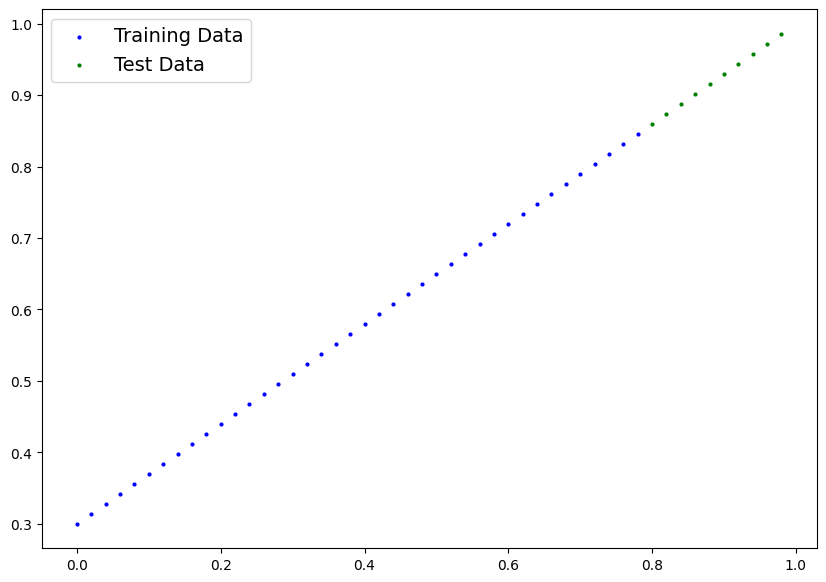

In [2]:
def plotPredictions (trainData = XTrain,
                     trainLabels = yTrain,
                     testData = XTest,
                     testLabels = yTest,
                     predictions = None):
  # Initialize figure
  plt.figure(figsize= (10,7))

  # Plot the training data
  plt.scatter(trainData, trainLabels, c="b", s=4, label="Training Data")

  # Plot the test data
  plt.scatter(testData, testLabels, c="g", s=4, label="Test Data")

  # Plot the predictions if available
  if predictions is not None:
     plt.scatter(testData, predictions, c="r", s=4, label="Predictions")

  # Addition of legend to plot
  plt.legend (prop={"size": 14})

plotPredictions()

Now that we've set up everything, it's time to create a model off of what from the input and output. We will do this by creating a linear regression model class.

In [3]:
class linearRegressionModel(nn.Module):
  def __init__(self):
    # IDK what this is
    super().__init__()

    # Initializing parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad= True, dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype= torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formul

Now it's time to create an instance of a linear regression model.

In [4]:
torch.manual_seed(1738)

# Initializing model!!!
model_0 = linearRegressionModel()

# Gives us all parameters
print(list(model_0.parameters()))
print("\n")

model_0.state_dict()

[Parameter containing:
tensor([0.5606], requires_grad=True), Parameter containing:
tensor([0.0493], requires_grad=True)]




OrderedDict([('weights', tensor([0.5606])), ('bias', tensor([0.0493]))])

Now we can make predictions with the `torch.inference_mode()` as you can see the predictions are based on random parameters and will not predict well.

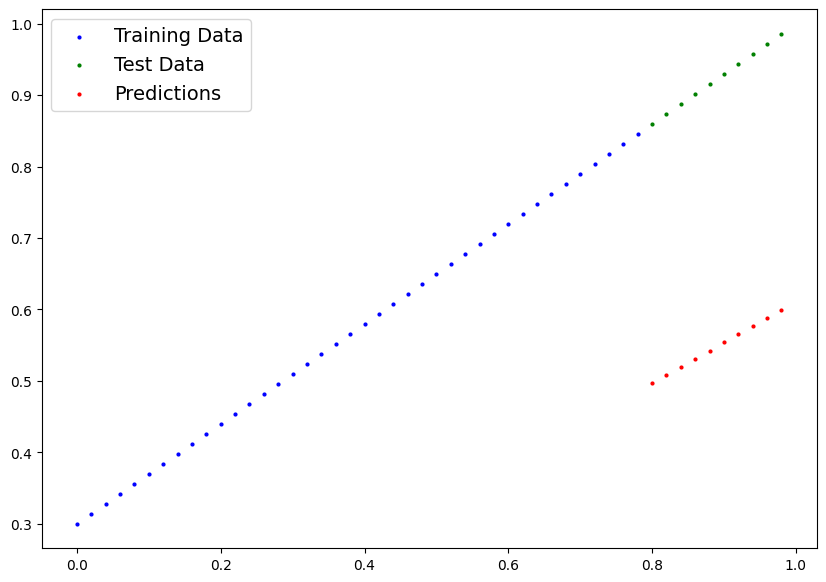

In [5]:
with torch.inference_mode():
  yPreds = model_0(XTest)
plotPredictions(predictions= yPreds)

Now, it's time to add an optomizer and loss function, the two are deeply interwoven and interact with one another. The optimizer changes parameters based on loss function. The learning rate adjust the severity of which the optomizer changes the values. Sort of like a scalar in front of an already operating optimizer function.

Now, we're going to incorporate a training loop. The training loop involves:


1.   Loop through data
2.   Forward Pass
3.  Loss calculation
4. Optimizer zero grad
5. Loss backward - data moves backward through NN
6. Optimizer step

Main point of gradient descent is for loss values to be minimized. Also, there are optimizers that adjust LR to ensure that loss isn't overshot in the opposite direction. So LR gets smaller and smaller as it approaches the idea value.

The bottom point of a loss model is known as convergence.

Loss value is based on how incorrect the values are according to the true values.




In [6]:
loss1 = nn.L1Loss()
optim1 = torch.optim.SGD(params= model_0.parameters(), lr = .001)

epochs = 1000
epoch_count = []
training_loss = []
test_loss = []

for epoch in range(epochs):
  # Turns on different settings in the model needed for evaluation and testing
  model_0.train()

  # Forward pass
  yPreds = model_0(XTrain)

  m0Loss = loss1(yPreds, yTrain)
  training_loss.append(m0Loss)

  optim1.zero_grad() # Optomizer, zero-grad

  m0Loss.backward() # Perform backward propogation (resources below)

  optim1.step() # Step optomizer, performs gradient descent.

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # Turns off further settings not needed for testing
    testPred = model_0(XTest)

    #Getting a measure of Test loss
    testLoss = loss1(testPred, yTest)
    test_loss.append(testLoss)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {m0Loss} | Test Loss: {testLoss}")

  epoch_count.append(epoch)

Epoch: 0 | Loss: 0.30510759353637695 | Test Loss: 0.37346190214157104
Epoch: 100 | Loss: 0.18989770114421844 | Test Loss: 0.2387523651123047
Epoch: 200 | Loss: 0.07468777894973755 | Test Loss: 0.10404279083013535
Epoch: 300 | Loss: 0.005737795028835535 | Test Loss: 0.013718539848923683
Epoch: 400 | Loss: 0.002295686397701502 | Test Loss: 0.005307585000991821
Epoch: 500 | Loss: 0.0007752880337648094 | Test Loss: 0.0006151795387268066
Epoch: 600 | Loss: 0.0007752880337648094 | Test Loss: 0.0006151795387268066
Epoch: 700 | Loss: 0.0007752880337648094 | Test Loss: 0.0006151795387268066
Epoch: 800 | Loss: 0.0007752880337648094 | Test Loss: 0.0006151795387268066
Epoch: 900 | Loss: 0.0007752880337648094 | Test Loss: 0.0006151795387268066


Here we're printing out the approximation created by the NN, we went through the iteration 100,000+ times and printed out the loss values in accordance to the chart.

Backpropogation:
1. https://youtu.be/tIeHLnjs5U8?si=wbVHVtRfV2pfXW4z
2. https://youtu.be/Ilg3gGewQ5U?si=zysn0p12y5XNatlS

Gradient Descent:
1. https://youtu.be/IHZwWFHWa-w?si=SUXD6v0p58J9dKRO
2. https://youtu.be/fXQXE96r4AY?si=KKFwUqExzvozxwtH

Other concepts to explore:
1. Normalization layers
2. Dropout layers

`torch.inference_mode()` turns off gradient tracking. This is important because

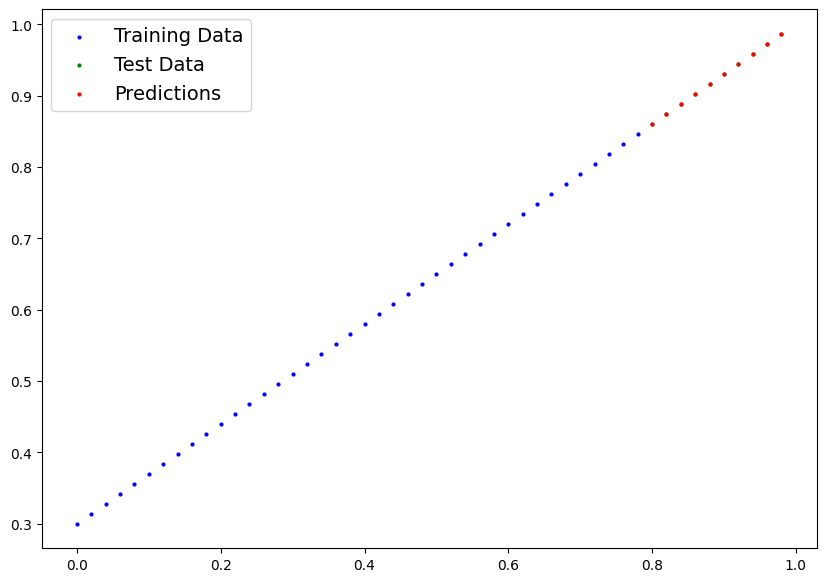

In [7]:
with torch.inference_mode():
  yPreds = model_0(XTest)
plotPredictions(predictions= yPreds)

To check the efficacy of the set, we can plot loss values as a result of epochs.

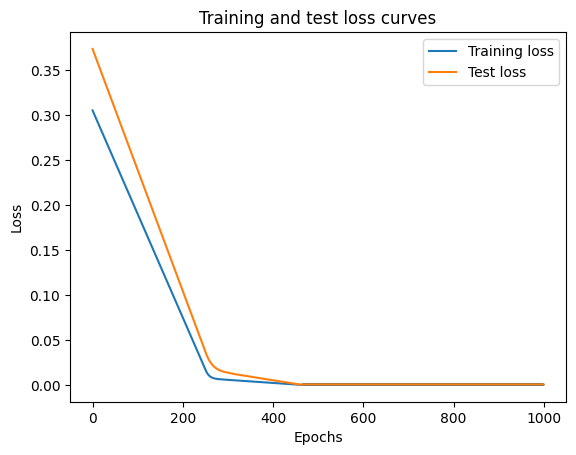

In [8]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(training_loss)), label= "Training loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss)), label= "Test loss")
plt.title("Training and test loss curves")
plt.ylabel ("Loss" )
plt.xlabel ("Epochs" )
plt. legend() ;

Now to save our model. We need to import the path library and save to a specefied path. Look to google documentation to learn how to save files from colab over to drive.

In [9]:
from pathlib import Path

# Create a model directory
modelPath = Path("models")
modelPath.mkdir(parents= True, exist_ok= True)

# Create a model savepath
modelName = '01_pytorch_workflow_model.pth'

modelSavePath = modelPath / modelName

print(f"SAVING MODEL TO: {modelSavePath}")

torch.save(obj= model_0.state_dict(), f= modelSavePath)

SAVING MODEL TO: models/01_pytorch_workflow_model.pth


Now its time to load the model in. This helps with exporting models, utilizing them in code and all that jazz. So eseentially, we're going to load in a state_dict into another model.

In [10]:
loaded_model_0 = linearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f= modelSavePath))
print(model_0.state_dict())
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3008]))])
OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3008]))])


Time to evaluate our loaded model.

In [11]:
loaded_model_0.eval()
with torch.inference_mode():
  loadedYPreds = loaded_model_0(XTest)

model_0.eval()
with torch.inference_mode():
  yPreds = model_0(XTest)

print(loadedYPreds == yPreds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


Retrying the loop all over again


In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"We are using: {device}")

weight1 = .420
bias1 = .69

x1 = torch.arange(start= 0, end= 1, step= .02).unsqueeze(dim= 1)

y1 = (x1 * weight1) + bias1

trainSplit1 = int(len(x1)*.8)

x1Train, y1Train = x1[:trainSplit1], y1[:trainSplit1]

x1Test, y1Test = x1[trainSplit1:], y1[trainSplit1:]

We are using: cuda


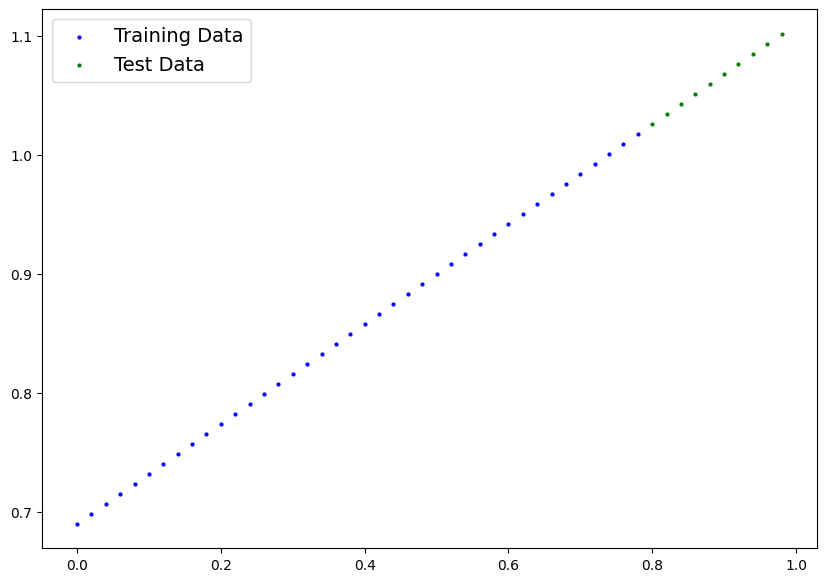

In [13]:
def plotPredictions1 (trainData = x1Train,
                     trainLabels = y1Train,
                     testData = x1Test,
                     testLabels = y1Test,
                     predictions = None):
  # Initialize figure
  plt.figure(figsize= (10,7))

  # Plot the training data
  plt.scatter(trainData, trainLabels, c="b", s=4, label="Training Data")

  # Plot the test data
  plt.scatter(testData, testLabels, c="g", s=4, label="Test Data")

  # Plot the predictions if available
  if predictions is not None:
     plt.scatter(testData, predictions, c="r", s=4, label="Predictions")

  # Addition of legend to plot
  plt.legend (prop={"size": 14})

plotPredictions1()

In [19]:
class jakesHandCode(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.linear_layer(x)

# Manual seed to standardize randomization
torch.manual_seed = 42

# Counts for analysis of efficacy of program
epochs1_count = []
training_loss_values = []
test_loss_values = []

# Initialization of a model
jakesFirst = jakesHandCode()

# Creating optomizer and loss functions
loss2 = nn.L1Loss()
optOOO = torch.optim.SGD(params= jakesFirst.parameters(), lr = .001)

# Transferring data and models to proper device
jakesFirst.to(device)
x1Train = x1Train.to(device)
y1Train = y1Train.to(device)
x1Test = x1Test.to(device)
y1Test = y1Test.to(device)


epochs1 = 10000
for epoch1 in range(epochs1):
  #Flip to training mode
  jakesFirst.train()

  # first forward pass
  y1Preds = jakesFirst(x1Train)

  # Loss calculation and assignment
  trainLoss = loss2(y1Preds, y1Train)

  # Zero, grad of optomizer
  optOOO.zero_grad()

  # Perform backward propogation (resources below)
  trainLoss.backward()

  # Step optomizer, performs gradient descent.
  optOOO.step()

  with torch.inference_mode():
    testPred1 = jakesFirst(x1Test)
    testLoss1 = loss2(testPred1, y1Test)

  if epoch1 % 1000 == 0:
    print(f"Epochs: {epoch1} | Training loss: {trainLoss} | Test loss: {testLoss1}")

Epochs: 0 | Training loss: 0.4002465307712555 | Test loss: 1.0503367185592651
Epochs: 1000 | Training loss: 0.21477460861206055 | Test loss: 0.5438196659088135
Epochs: 2000 | Training loss: 0.17874151468276978 | Test loss: 0.4185291826725006
Epochs: 3000 | Training loss: 0.14438648521900177 | Test loss: 0.3375713527202606
Epochs: 4000 | Training loss: 0.11004278808832169 | Test loss: 0.25722771883010864
Epochs: 5000 | Training loss: 0.0756988450884819 | Test loss: 0.17695419490337372
Epochs: 6000 | Training loss: 0.041355084627866745 | Test loss: 0.09661119431257248
Epochs: 7000 | Training loss: 0.007011063396930695 | Test loss: 0.01633632183074951
Epochs: 8000 | Training loss: 0.00039561689482070506 | Test loss: 0.0004979014629498124
Epochs: 9000 | Training loss: 0.00039561689482070506 | Test loss: 0.0004979014629498124


OrderedDict([('linear_layer.weight', tensor([[0.4191]], device='cuda:0')), ('linear_layer.bias', tensor([0.6900], device='cuda:0'))])


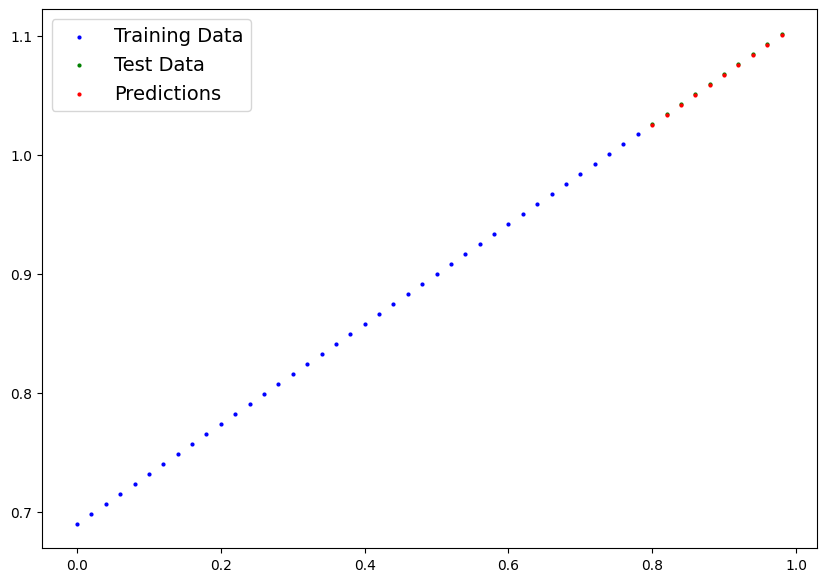

In [20]:
with torch.inference_mode():
  yPreds = jakesFirst(x1Test)
plotPredictions1(predictions= yPreds.to("cpu").numpy())

print(jakesFirst.state_dict())

Now, it's time to practice saving the model once more.

In [21]:
from pathlib import Path

# Create a model directory
modelPath = Path("models")
modelPath.mkdir(parents= True, exist_ok= True)

# Create a model savepath
modelName = 'jakeys_model.pth'

modelSavePath = modelPath / modelName

print(f"SAVING MODEL TO: {modelSavePath}")

torch.save(obj= jakesFirst.state_dict(), f= modelSavePath)

SAVING MODEL TO: models/jakeys_model.pth


After this, we'll work on loading the model. This will be done by taking the preiously saved parameters from the last model and loading it into the new one.

In [22]:
jakesFirstLoaded = jakesHandCode()
jakesFirstLoaded.load_state_dict(torch.load(f= modelSavePath))

jakesFirstLoaded.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4191]])),
             ('linear_layer.bias', tensor([0.6900]))])